In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
Y = breast_cancer_wisconsin_diagnostic.data.targets 
  


In [3]:
import pandas as pd


data = pd.concat([X, Y], axis=1)

# Now 'data' contains both features and target variable joined together
print(data.head())


   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  texture3  \
0      0.3001          0.14710     0.2419             0.07871  ...     17.33   
1      0.0869          0.07017     0.1812             0.05667  ...     23.41   
2      0.1974          0.12790     0.2069             0.05999  ...     25.53   
3      0.2414          0.10520     0.2597             0.09744  ...     26.50   
4      0.1980          0.10430     0.1809             0.05883  ...     16.67   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.

In [4]:
data = data.dropna()

In [5]:
X = data.drop(['Diagnosis'],axis = 'columns')

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your DataFrame and you want to normalize all columns
scaler = MinMaxScaler()  # Create a MinMaxScaler object

# Fit the scaler to your data and transform it
normalized_data = scaler.fit_transform(X)



In [7]:
x = normalized_data

In [8]:
y = data['Diagnosis']

In [9]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'y' is your target variable
label_encoder = LabelEncoder()

# Fit label encoder and transform target variable 'y'
y = label_encoder.fit_transform(y)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [11]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='rbf', gamma=0.5, C=0.1)


svm_classifier.fit(x_train, y_train)

svm_classifier.score(x_test,y_test)

0.9370629370629371

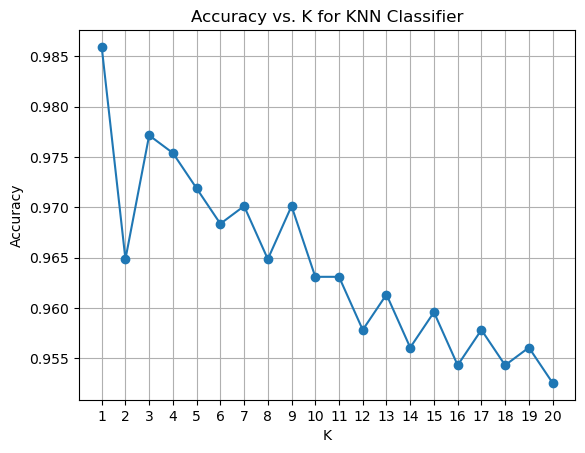

In [12]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split



# Define range of K values to try
k_values = range(1, 21)  # Adjust the range as needed

# Initialize lists to store accuracy scores for different K values
accuracy_scores = []

# Iterate over different K values
for k in k_values:
    # Initialize KNN classifier with current value of K
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier on training data
    knn_classifier.fit(x_train, y_train)
    
    # Evaluate accuracy on validation data
    accuracy = knn_classifier.score(x, y)
    
    # Append accuracy score to the list
    accuracy_scores.append(accuracy)

# Plot K values vs. accuracy scores
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K for KNN Classifier')
plt.xticks(k_values)
plt.grid(True)
plt.show()


From the graph We can see the optimum value for k. which is 3 and 5 in our case

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(x_train, y_train)

knn_classifier.score(x_test,y_test)

0.951048951048951

In [14]:
import numpy as np
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

kde_classes = []
for class_label in np.unique(y_train):
    X_class = x_train[y_train == class_label]
    kde = KernelDensity(kernel='gaussian', bandwidth=0.2)  # You can adjust bandwidth
    kde.fit(X_class)
    kde_classes.append(kde)
    
# Classify test data
predicted_labels = []
for sample in x_test:  # Iterate over rows of x_test directly
    class_scores = []
    for kde in kde_classes:
        class_scores.append(np.exp(kde.score([sample])))
    predicted_label = np.argmax(class_scores)
    predicted_labels.append(predicted_label)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print("Accuracy:", accuracy)


Accuracy: 0.951048951048951
